In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Assigning the datset path as variables
file_path_q1 = 'Divvy_Trips_2019_Q1.csv'
file_path_q2 = 'Divvy_Trips_2019_Q2.csv'
file_path_q3 = 'Divvy_Trips_2019_Q3.csv'
file_path_q4 = 'Divvy_Trips_2019_Q4.csv'

#Reading the files into dataframes
data_q1 = pd.read_csv(file_path_q1)
data_q2 = pd.read_csv(file_path_q2)
data_q3 = pd.read_csv(file_path_q3)
data_q4 = pd.read_csv(file_path_q4)

# Data Cleaning Process. 
The files are divided into quarters, I will work on each quarter individually, starting with Q1. My goal here is:

Check for duplicate entries.
Search for and handle missing values.
Identify outliers in columns.
Check and, if necessary, convert data to standardized values ​​(integers, strings, dates).
Consolidate the dataset and standardize it.
Perform the same process for all four data sets.


In [3]:
data_q1.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


In [4]:
data_q2.head()

,01 - Rental Details Rental ID,01 - Rental Details Local Start Time,01 - Rental Details Local End Time,01 - Rental Details Bike ID,01 - Rental Details Duration In Seconds Uncapped,03 - Rental Start Station ID,03 - Rental Start Station Name,02 - Rental End Station ID,02 - Rental End Station Name,User Type,Member Gender,05 - Member Details Member Birthday Year
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0


In [5]:
data_q3.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,NaN,NaN


In [6]:
data_q4.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940.0,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987.0
1,25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258.0,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998.0
2,25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850.0,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991.0
3,25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,"2,350.0",313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990.0
4,25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,"1,867.0",210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987.0


In [7]:
data_q1.shape

(365069, 12)

In [8]:
data_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365069 entries, 0 to 365068
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            365069 non-null  int64  
 1   start_time         365069 non-null  object 
 2   end_time           365069 non-null  object 
 3   bikeid             365069 non-null  int64  
 4   tripduration       365069 non-null  object 
 5   from_station_id    365069 non-null  int64  
 6   from_station_name  365069 non-null  object 
 7   to_station_id      365069 non-null  int64  
 8   to_station_name    365069 non-null  object 
 9   usertype           365069 non-null  object 
 10  gender             345358 non-null  object 
 11  birthyear          347046 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 33.4+ MB


In [9]:
data_q1.isnull().sum()

trip_id                  0
start_time               0
end_time                 0
bikeid                   0
tripduration             0
from_station_id          0
from_station_name        0
to_station_id            0
to_station_name          0
usertype                 0
gender               19711
birthyear            18023
dtype: int64

In [10]:
data_q1['gender'].value_counts()
data_q1['gender'].fillna('Male', inplace=True)
data_q1['birthyear'].fillna(data_q1['birthyear'].mean(), inplace=True)

In [11]:
data_q1.isnull().sum()

trip_id              0
start_time           0
end_time             0
bikeid               0
tripduration         0
from_station_id      0
from_station_name    0
to_station_id        0
to_station_name      0
usertype             0
gender               0
birthyear            0
dtype: int64

In [12]:
data_q1.duplicated().sum()

0

In [13]:
data_q1.describe()

,trip_id,bikeid,from_station_id,to_station_id,birthyear
count,3.650690e+05,365069.000000,365069.000000,365069.000000,365069.000000
mean,2.196087e+07,3429.484607,198.088816,198.581123,1981.674297
std,1.271750e+05,1923.321025,153.493553,154.468304,10.964576
min,2.174244e+07,1.000000,2.000000,2.000000,1900.000000
25%,2.184876e+07,1777.000000,76.000000,76.000000,1976.000000
50%,2.196183e+07,3489.000000,170.000000,168.000000,1984.000000
75%,2.207182e+07,5157.000000,287.000000,287.000000,1990.000000
max,2.217853e+07,6471.000000,665.000000,665.000000,2003.000000


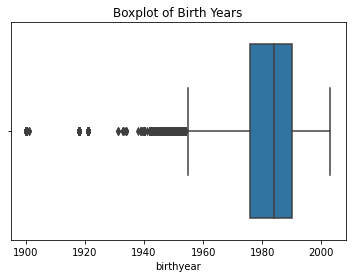

In [14]:
sns.boxplot(x=data_q1['birthyear'])
plt.title('Boxplot of Birth Years')
plt.show()


In [15]:
Q1 = data_q1['birthyear'].quantile(0.25)
Q3 = data_q1['birthyear'].quantile(0.75)
IQR = Q3 - Q1
IQR

outliers_birthyear = data_q1[(data_q1['birthyear'] < Q1 - (IQR*1.5)) | (data_q1['birthyear'] > Q3 + (IQR*1.5))]
outliers_birthyear.shape

# keeping the outliers

(6434, 12)

In [16]:
print("The unique values in the usertype",data_q1['usertype'].unique())
print("\nThe number of usertypes\n",data_q1['usertype'].value_counts())
print("\nThe number of unique values in gender\n",data_q1['gender'].unique())
print("\nThe frequency of genders\n",data_q1['gender'].value_counts())
print("\nNumber of uniques bikes id is\n",data_q1['bikeid'].nunique())
print("\n The bikeId and the frequency\n",data_q1['bikeid'].value_counts())

The unique values in the usertype ['Subscriber' 'Customer']

The number of usertypes
 Subscriber    341906
Customer       23163
Name: usertype, dtype: int64

The number of unique values in gender
 ['Male' 'Female']

The frequency of genders
 Male      298151
Female     66918
Name: gender, dtype: int64

Number of uniques bikes id is
 4769

 The bikeId and the frequency
 3457    235
6407    229
5983    224
6074    222
3494    221
       ... 
1706      1
2481      1
4071      1
2231      1
1404      1
Name: bikeid, Length: 4769, dtype: int64


In [17]:
print("\nNumber of uniques from station id is\n",data_q1['from_station_id'].nunique())
print("\n The satation and the frequency\n",data_q1['from_station_name'].value_counts())


Number of uniques from station id is
 594

 The satation and the frequency
 Clinton St & Washington Blvd      7699
Clinton St & Madison St           6565
Canal St & Adams St               6342
Columbus Dr & Randolph St         4655
Canal St & Madison St             4571
                                  ... 
Racine Ave & 61st St                 1
State St & 76th St                   1
South Chicago Ave & Elliot Ave       1
Halsted St & 69th St                 1
Carpenter St & 63rd St               1
Name: from_station_name, Length: 594, dtype: int64


In [18]:
print("\nNumber of uniques Destination station id is\n",data_q1['to_station_id'].nunique())
print("\n The Destination satation and the frequency\n",data_q1['to_station_name'].value_counts())


Number of uniques Destination station id is
 600

 The Destination satation and the frequency
 Clinton St & Washington Blvd    7699
Clinton St & Madison St         6859
Canal St & Adams St             6744
Canal St & Madison St           4875
Michigan Ave & Washington St    4412
                                ... 
State St & 54th St                 1
Racine Ave & 61st St               1
Halsted St & 59th St               1
Halsted St & 51st St               1
Phillips Ave & 79th St             1
Name: to_station_name, Length: 600, dtype: int64


In [19]:
# CNVERTING FROM OBJECT TO DATE TIME
data_q1['start_time'] = pd.to_datetime(data_q1['start_time'])
data_q1['end_time'] = pd.to_datetime(data_q1['end_time'])
data_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365069 entries, 0 to 365068
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            365069 non-null  int64         
 1   start_time         365069 non-null  datetime64[ns]
 2   end_time           365069 non-null  datetime64[ns]
 3   bikeid             365069 non-null  int64         
 4   tripduration       365069 non-null  object        
 5   from_station_id    365069 non-null  int64         
 6   from_station_name  365069 non-null  object        
 7   to_station_id      365069 non-null  int64         
 8   to_station_name    365069 non-null  object        
 9   usertype           365069 non-null  object        
 10  gender             365069 non-null  object        
 11  birthyear          365069 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(5)
memory usage: 33.4+ MB


In [20]:
data_q1['ride_length'] = data_q1['end_time'] - data_q1['start_time'] #Creating a new field named ride_length

In [21]:
#creating column named day of the week extracted from the start_time column adding +1 for monday = 1
data_q1['day_of_week'] = data_q1['start_time'].dt.dayofweek + 1

In [22]:
# Exibir as primeiras linhas do DataFrame com as novas colunas
print(data_q1[['start_time', 'end_time', 'ride_length', 'day_of_week']].head())

           start_time            end_time     ride_length  day_of_week
0 2019-01-01 00:04:37 2019-01-01 00:11:07 0 days 00:06:30            2
1 2019-01-01 00:08:13 2019-01-01 00:15:34 0 days 00:07:21            2
2 2019-01-01 00:13:23 2019-01-01 00:27:12 0 days 00:13:49            2
3 2019-01-01 00:13:45 2019-01-01 00:43:28 0 days 00:29:43            2
4 2019-01-01 00:14:52 2019-01-01 00:20:56 0 days 00:06:04            2


In [23]:
data_q1.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_length,day_of_week
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,0 days 00:06:30,2
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,0 days 00:07:21,2
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,0 days 00:13:49,2
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,0 days 00:29:43,2
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,0 days 00:06:04,2


In [24]:
print("The total week days\n",data_q1['day_of_week'].unique())
print("\nThe frequency of days\n",data_q1['day_of_week'].value_counts())

The total week days
 [2 3 4 5 6 7 1]

The frequency of days
 4    66903
5    63047
2    61005
3    60414
1    50399
6    35302
7    27999
Name: day_of_week, dtype: int64


In [25]:
#from this we can clearly understand the saturday and sundays are the less busier days compraed to other days

In [26]:
data_q2.columns

Index(['01 - Rental Details Rental ID', '01 - Rental Details Local Start Time',
       '01 - Rental Details Local End Time', '01 - Rental Details Bike ID',
       '01 - Rental Details Duration In Seconds Uncapped',
       '03 - Rental Start Station ID', '03 - Rental Start Station Name',
       '02 - Rental End Station ID', '02 - Rental End Station Name',
       'User Type', 'Member Gender',
       '05 - Member Details Member Birthday Year'],
      dtype='object')

In [27]:
old_to_new_mapping = {
    '01 - Rental Details Rental ID': 'trip_id',
    '01 - Rental Details Local Start Time': 'start_time',
    '01 - Rental Details Local End Time': 'end_time',
    '01 - Rental Details Bike ID': 'bikeid',
    '01 - Rental Details Duration In Seconds Uncapped': 'tripduration',
    '03 - Rental Start Station ID': 'from_station_id',
    '03 - Rental Start Station Name': 'from_station_name',
    '02 - Rental End Station ID': 'to_station_id',
    '02 - Rental End Station Name': 'to_station_name',
    'User Type': 'usertype',
    'Member Gender': 'gender',
    '05 - Member Details Member Birthday Year': 'birthyear'
}

data_q2.rename(columns=old_to_new_mapping, inplace=True)

data_q2.head(3)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0


In [36]:
data_q2.isnull().sum()

trip_id              0
start_time           0
end_time             0
bikeid               0
tripduration         0
from_station_id      0
from_station_name    0
to_station_id        0
to_station_name      0
usertype             0
gender               0
birthyear            0
ride_length          0
day_of_week          0
dtype: int64

In [37]:
data_q2.duplicated().sum()

0

In [38]:
data_q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108163 entries, 0 to 1108162
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype          
---  ------             --------------    -----          
 0   trip_id            1108163 non-null  int64          
 1   start_time         1108163 non-null  datetime64[ns] 
 2   end_time           1108163 non-null  datetime64[ns] 
 3   bikeid             1108163 non-null  int64          
 4   tripduration       1108163 non-null  object         
 5   from_station_id    1108163 non-null  int64          
 6   from_station_name  1108163 non-null  object         
 7   to_station_id      1108163 non-null  int64          
 8   to_station_name    1108163 non-null  object         
 9   usertype           1108163 non-null  object         
 10  gender             1108163 non-null  object         
 11  birthyear          1108163 non-null  float64        
 12  ride_length        1108163 non-null  timedelta64[ns]
 13  day_of_week 

In [28]:
data_q2['gender'].value_counts()

Male      678568
Female    244041
Name: gender, dtype: int64

In [29]:
data_q2['gender'].fillna('Male', inplace=True)
data_q2['birthyear'].fillna(data_q2['birthyear'].mean(), inplace=True)
data_q2['start_time'] = pd.to_datetime(data_q2['start_time'])
data_q2['end_time'] = pd.to_datetime(data_q2['end_time'])
data_q2['ride_length'] = data_q2['end_time'] - data_q2['start_time']
data_q2['day_of_week'] = data_q2['start_time'].dt.dayofweek + 1
data_q2.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_length,day_of_week
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0,0 days 00:07:26,1
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0,0 days 00:17:28,1
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0,0 days 00:04:12,1
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0,0 days 00:05:57,1
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0,0 days 00:16:47,1


In [40]:
data_q3.isnull().sum()

trip_id              0
start_time           0
end_time             0
bikeid               0
tripduration         0
from_station_id      0
from_station_name    0
to_station_id        0
to_station_name      0
usertype             0
gender               0
birthyear            0
ride_length          0
day_of_week          0
dtype: int64

In [31]:
data_q3["gender"].value_counts()

Male      957353
Female    396015
Name: gender, dtype: int64

In [32]:
data_q3['gender'].fillna('Male', inplace=True)
data_q3['birthyear'].fillna(data_q3['birthyear'].mean(), inplace=True)
data_q3['start_time'] = pd.to_datetime(data_q3['start_time'])
data_q3['end_time'] = pd.to_datetime(data_q3['end_time'])
data_q3['ride_length'] = data_q3['end_time'] - data_q3['start_time']
data_q3['day_of_week'] = data_q3['start_time'].dt.dayofweek + 1
data_q3.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_length,day_of_week
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.000000,0 days 00:20:14,1
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,Male,1984.902996,0 days 00:17:28,1
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,Male,1984.902996,0 days 00:25:54,1
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,Male,1984.902996,0 days 00:25:03,1
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,Male,1984.902996,0 days 00:20:13,1


In [33]:
data_q3.duplicated().sum()

0

In [34]:
data_q4["gender"].value_counts()

Male      486459
Female    151004
Name: gender, dtype: int64

In [41]:
data_q4.isnull().sum()

trip_id              0
start_time           0
end_time             0
bikeid               0
tripduration         0
from_station_id      0
from_station_name    0
to_station_id        0
to_station_name      0
usertype             0
gender               0
birthyear            0
ride_length          0
day_of_week          0
dtype: int64

In [35]:
data_q4['gender'].fillna('Male', inplace=True)
data_q4['birthyear'].fillna(data_q4['birthyear'].mean(), inplace=True)
data_q4.duplicated().sum()
data_q4['start_time'] = pd.to_datetime(data_q4['start_time'])
data_q4['end_time'] = pd.to_datetime(data_q4['end_time'])
data_q4['ride_length'] = data_q4['end_time'] - data_q4['start_time']
data_q4['day_of_week'] = data_q4['start_time'].dt.dayofweek + 1
data_q4.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_length,day_of_week
0,25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940.0,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987.0,0 days 00:15:41,2
1,25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258.0,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998.0,0 days 00:04:18,2
2,25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850.0,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991.0,0 days 00:14:11,2
3,25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,"2,350.0",313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990.0,0 days 00:39:11,2
4,25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,"1,867.0",210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987.0,0 days 00:31:08,2


In [42]:
data_q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704054 entries, 0 to 704053
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   trip_id            704054 non-null  int64          
 1   start_time         704054 non-null  datetime64[ns] 
 2   end_time           704054 non-null  datetime64[ns] 
 3   bikeid             704054 non-null  int64          
 4   tripduration       704054 non-null  object         
 5   from_station_id    704054 non-null  int64          
 6   from_station_name  704054 non-null  object         
 7   to_station_id      704054 non-null  int64          
 8   to_station_name    704054 non-null  object         
 9   usertype           704054 non-null  object         
 10  gender             704054 non-null  object         
 11  birthyear          704054 non-null  float64        
 12  ride_length        704054 non-null  timedelta64[ns]
 13  day_of_week        704054 non

In [47]:
data_q1.to_csv('data_q1_editado.csv', index=False)
data_q2.to_csv('data_q2_editado.csv', index=False)
data_q3.to_csv('data_q3_editado.csv', index=False)
data_q4.to_csv('data_q4_editado.csv', index=False)